In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import binom, poisson, norm
from math import sqrt, factorial

## Проектная работа. Статистический анализ данных сервиса аренды самокатов GoFast
Предметом исследования является популярный сервис по аренде самокатов GoFast. Чтобы совершать поездки по городу, пользователи сервиса пользуются мобильным приложением. Сервис активно развивается и привлекает все больше пользователей. Для оптимизации бизнес-процессов и повышения эффективности деятельности компании необходимо провести анализ данных о пользователях и их поездках.

### Цель работы
Целью данного исследования является анализ данных о пользователях и поездках в сервисе GoFast с целью выявления основных тенденций использования сервиса и проверки гипотез, способствующих увеличению его эффективности.

### Ход работы
В нашем распоряжении имеются три датасета: users_go.csv, хранящий данные о пользователях, rides_go.csv, хранящик данные о поездках пользователей и subscriptions_go.csv, хранящий информацию о подписках в данном сервисе. О качестве данных нет никакой информации. Поэтому прежде чем приступить к анализу, понадобиться обзор данных, чтобы полученные в конечном итоге результаты были достоверны

Поэтому мое исследование будет иметь следующий порядок действий:
1. Исследование данных: Взгляд на данные для понимания их структуры и содержания.
2. Предобработка данных: Очистка данных от ошибок, пропусков и дубликатов, чтобы гарантировать их качество и точность анализа.
3. Исследовательский анализ данных
4. Расчеты и подготовка данных: Выполнение необходимых расчетов и подготовка данных для последующей проверки гипотез.
5. Проверка гипотез: Проведение статистических тестов для подтверждения или опровержения предположений и гипотез.
6. Анализ для маркетинга: Предоставление цифр и выводов, которые помогут маркетологам принимать эффективные решения.
7. Формулирование общего вывода: Сводка всех результатов и выводов проекта в четкое и понятное заключение.

### Шаг 1. Загрузка данных

В первую очередь выгрузим данные. Сделаем это таким образом, чтобы получить данные можно было в любом случае:

In [2]:
try:
    df_user_go = pd.read_csv('users_go.csv')
    df_rides_go = pd.read_csv('rides_go.csv')
    df_sub_go = pd.read_csv('subscriptions_go.csv')
except:
    df_user_go = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
    df_rides_go = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
    df_sub_go = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

Напишем функцию на вход которой будет подано название таблицы и которая выведет первые строки датафреймов и информацию о них:

In [3]:
def datafraim_print_info(datafraim):
    print(datafraim.info())
    display(datafraim.head(10))

#### Таблица с пользователями:

In [4]:
datafraim_print_info(df_user_go)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


#### Таблица с поездками:

In [5]:
datafraim_print_info(df_rides_go)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


#### Таблица с подписками:

In [6]:
datafraim_print_info(df_sub_go)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


#### Промежуточный вывод по шагу 1:
Данные были загружены успешно. Было замечено что практически все колонки соответствуют своим типам, только у колонки датафрейма с поездками стоит сменить тип колонки date. На данный момент стоит тип object, а нужен тип дата

### Шаг 2. Предобработка данных

В первую очередь приведем колонку date датафрейма с поездками с правильному типу:

In [7]:
df_rides_go['date'] = pd.to_datetime(df_rides_go['date'], format = '%Y-%m-%d')

Проверим, что все изменилось успешно:

In [8]:
datafraim_print_info(df_rides_go)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB
None


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


Тип колонки изменен успешно

Создадим новую колонку в датафрейме с поездками, которая будет хранить номер месяца на основе колонки date

In [9]:
df_rides_go['month_of_date'] = df_rides_go['date'].dt.month
df_rides_go.head()

,user_id,distance,duration,date,month_of_date
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Колонка создана успешно

Далее проверим все три датафрейма на наличие пропусков и дубликатов. Для этого создадим функцию, которая на ввод будет получать название датафрейма, а на выводе давать нам инфорамцию о пропусках и явных дубликатах

In [10]:
def datafraim_null_n_dublicates(datafraim):
    print('Число явных дубликатов в датафрейме:', datafraim.duplicated().sum())
    display(pd.DataFrame(round(datafraim.isna().mean()*100,)).sort_values(by = 0).style.background_gradient('coolwarm'))

In [11]:
datafraim_null_n_dublicates(df_user_go)

Число явных дубликатов в датафрейме: 31


,0
user_id,0.000000
name,0.000000
age,0.000000
city,0.000000
subscription_type,0.000000


Как можно заметить в датафрейме с пользователями пропуски отсутствуют. Однако есть явные дубликаты. Удалим же их

In [12]:
df_user_go = df_user_go.drop_duplicates()
datafraim_null_n_dublicates(df_user_go)

Число явных дубликатов в датафрейме: 0


,0
user_id,0.000000
name,0.000000
age,0.000000
city,0.000000
subscription_type,0.000000


Проверим колонки name и city на наличие неявных дубликатов

In [13]:
print(df_user_go['city'].value_counts())

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


In [14]:
print(df_user_go['name'].value_counts())

Мария        22
Анна         22
Александр    17
Дмитрий      17
Никита       16
             ..
Алина         3
Семен         2
Радмир        1
Тихон         1
Милана        1
Name: name, Length: 194, dtype: int64


Неявных дубликатов не обнаружено. Перейдем в сл.таблице - с поездками

In [15]:
datafraim_null_n_dublicates(df_rides_go)

Число явных дубликатов в датафрейме: 0


,0
user_id,0.000000
distance,0.000000
duration,0.000000
date,0.000000
month_of_date,0.000000


Выявим какой временной промежуток поездок предоставлен для анализа (пригодится в будущем):

In [16]:
print('Минимальная дата поездки:', df_rides_go['date'].min())
print('Максимальная дата поездки:', df_rides_go['date'].max())

Минимальная дата поездки: 2021-01-01 00:00:00
Максимальная дата поездки: 2021-12-30 00:00:00


Следовательно можно сделать вывод о том что нам дана информация о поездках за один 2021 год (нет только 31 декабря)
В этом датафрейме проверять наличие неявных дубликатов не имеет смысла

Перейдем к следующему датафрейму с подписками

In [17]:
datafraim_null_n_dublicates(df_sub_go)

Число явных дубликатов в датафрейме: 0


,0
subscription_type,0.000000
minute_price,0.000000
start_ride_price,0.000000
subscription_fee,0.000000


In [18]:
df_sub_go

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Как можно заметить, в данной таблице нет ни пропусков, ни явных/неявных дубликатов (сверху выведена полная таблица, хранящая 2 строки)

#### Промежуточные выводы по шагу 2:
После выполнения данного шага:
1. Было произведено изменение типа на правильный в колонке date датафрейма df_rides_go (таблица с поездками)
2. Выявлены явные дубликаты датафрейма df_user_go и удалены
3. Осуществлена проверка всех 3 датафреймов на наличие пустых значений. Их выявлено не было
4. Добавлена новая колонка, хранящая месяц поездки
5. А также выявлено для будущих исследований временной промежуток исследования - один год (2021 год)

### Шаг 3. Исследовательский анализ данных

#### Частота встречаемости городов

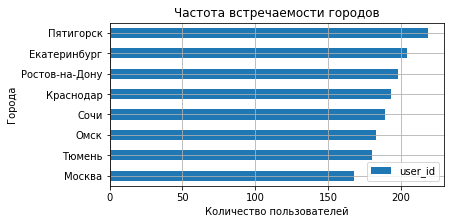

In [19]:
df_user_go.pivot_table(index = 'city', values = 'user_id', aggfunc = 'count').sort_values(by='user_id', ascending = True).plot( kind='barh', figsize = (6,3), grid = True)
plt.title('Частота встречаемости городов')
plt.xlabel('Количество пользователей')
plt.ylabel('Города')
plt.legend(loc='lower right')
plt.show()

In [20]:
df_user_go['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

##### Вывод:
1. Датафреймы хранят информацию о пользователях и поездках из 8 городов
2. Большая доля пользователей приходится на Пятигорск, Екатеринбург, Ростов-на-Дону, что составляет 621 человек (40.5% от общего числа пользователей)
3. Меньше всего пользователей приходится на Москву - 168 человек (11% от общего числа пользователей)

#### Cоотношение пользователей с подпиской и без подписки

In [21]:
table_subs = df_user_go.pivot_table(index = 'subscription_type', values = 'user_id', aggfunc = 'count').reset_index()

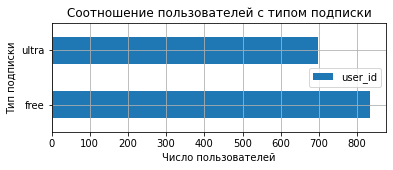

In [22]:
table_subs.plot(x = 'subscription_type', kind='barh', figsize = (6,2), grid = True )
plt.title('Соотношение пользователей с типом подписки')
plt.xlabel('Число пользователей')
plt.ylabel('Тип подписки')
plt.show()

In [23]:
table_subs

,subscription_type,user_id
0,free,835
1,ultra,699


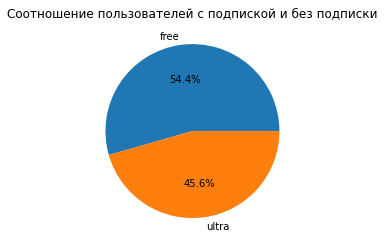

In [24]:
fig, ax = plt.subplots()
ax.pie(table_subs['user_id'], labels=table_subs['subscription_type'], autopct='%1.1f%%')
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.show()

##### Выводы:
1. В таблице представлено количество пользователей, где подписка либо отсутствует (free), либо является платной (ultra).
2. По данным таблицы видно, что количество пользователей без подписки (free) превышает количество пользователей с платной подпиской ultra. Это может свидетельствовать о том, что большинство пользователей предпочитают пользоваться сервисом без регулярной платы за подписку (54.4% пользователей без подписки и 45.6% пользователей с подпиской).

#### Возраст пользователей

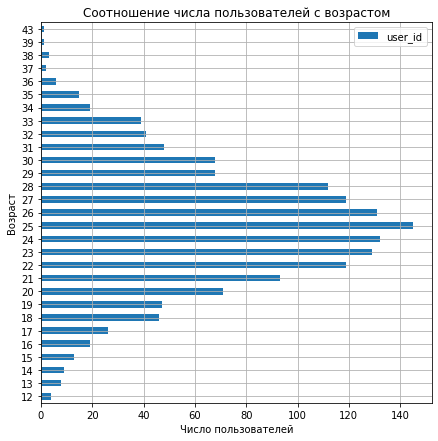

In [25]:
df_user_go.pivot_table(index = 'age', values = 'user_id', aggfunc = 'count').reset_index().plot(x = 'age', kind='barh', figsize = (7,7), grid = True)
plt.title('Соотношение числа пользователей с возрастом')
plt.xlabel('Число пользователей')
plt.ylabel('Возраст')
plt.show()

In [26]:
df_user_go.pivot_table(index = 'age', values = 'user_id', aggfunc = 'count').reset_index().sort_values(by = 'user_id', ascending = False)

,age,user_id
13,25,145
12,24,132
14,26,131
11,23,129
15,27,119
10,22,119
16,28,112
9,21,93
8,20,71
18,30,68


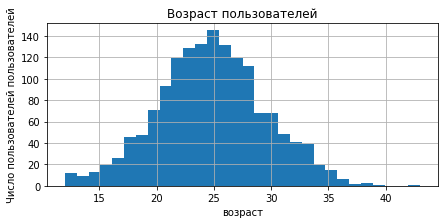

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [27]:
df_user_go['age'].plot(kind = 'hist', grid=True, figsize = (7,3), bins = 30)
plt.title('Возраст пользователей')
plt.xlabel('возраст')
plt.ylabel('Число пользователей пользователей')
plt.show()
df_user_go['age'].describe()

##### Вывод
1. Наибольшее количество пользователей в возрасте от 10 до 20 лет: Наибольшее количество пользователей сконцентрировано в возрастной группе от 10 до 20 лет, что может свидетельствовать о популярности приложения среди подростков и молодежи, которые активно используют самокаты в городской среде
2. Снижение числа пользователей с увеличением возраста: С увеличением возраста количество пользователей постепенно уменьшается, что вполне естественно, учитывая, что использование самоката может быть менее привлекательным для старших возрастных групп из-за физических ограничений или изменения интересов.
3. Выборка имеет нормальное распределение. Медиана и средний возраст практически совпадают (25 и 24,9 лет соответственно)

#### Расстояние, которое пользователь преодолел за одну поездку

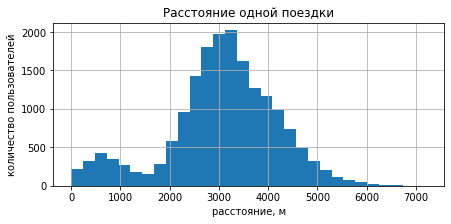

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [28]:
df_rides_go['distance'].plot(kind = 'hist', grid=True, figsize = (7,3), bins = 30)
plt.title('Расстояние одной поездки')
plt.xlabel('расстояние, м')
plt.ylabel('количество пользователей')
plt.show()
df_rides_go['distance'].describe()

##### Вывод
В большинстве случаев, среднее расстояние поездок составляет более 3 километров. Однако, есть небольшой пик около расстояния в 600 метров, что может указывать на то, что некоторые пользователи совершают короткие поездки, возможно, чтобы добраться до ближайших станций метро или других общественных транспортных средств.

#### Продолжительность поездок

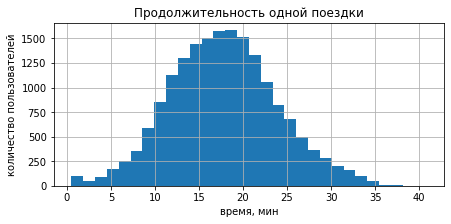

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [29]:
df_rides_go['duration'].plot(kind = 'hist', grid=True, figsize = (7,3), bins = 30)
plt.title('Продолжительность одной поездки')
plt.xlabel('время, мин')
plt.ylabel('количество пользователей')
plt.show()
df_rides_go['duration'].describe()

##### Вывод:
1. Пользователи берут самокат в аренду в среднем на ~18 минут
2. Распределение не содержит выбросов, имеет нормальное распределение

#### Промежуточный вывод шага 3
После исследования данных на шаге 3 можно сделать вывод, что:
1. Данные хранят информацию о пользователях и поездках из 8 городов
2. Большая доля пользователей приходится на Пятигорск, Екатеринбург, Ростов-на-Дону, что составляет 621 человек (40.5% от общего числа пользователей)
3. Меньше всего пользователей приходится на Москву - 168 человек (11% от общего числа пользователей)
4. Количество пользователей без подписки (free) превышает количество пользователей с платной подпиской ultra. Это может свидетельствовать о том, что большинство пользователей предпочитают пользоваться сервисом без регулярной платы за подписку (54.4% пользователей без подписки и 45.6% пользователей с подпиской).
5. Наибольшее количество пользователей в возрасте от 10 до 20 лет: Наибольшее количество пользователей сконцентрировано в возрастной группе от 10 до 20 лет, что может свидетельствовать о популярности приложения среди подростков и молодежи, которые активно используют самокаты в городской среде
6. Снижение числа пользователей с увеличением возраста: С увеличением возраста количество пользователей постепенно уменьшается, что вполне естественно, учитывая, что использование самоката может быть менее привлекательным для старших возрастных групп из-за физических ограничений или изменения интересов.
7. В большинстве случаев, среднее расстояние поездок составляет более 3 километров. Однако, есть небольшой пик около расстояния в 600 метров, что может указывать на то, что некоторые пользователи совершают короткие поездки, возможно, чтобы добраться до ближайших станций метро или других общественных транспортных средств.
8. Пользователи берут самокат в аренду в среднем на ~18 минут

### Шаг 4. Объединение данных

Объединим все три датафрейма в один для удобства дальнейшего использования:

In [30]:
df_all = df_rides_go
df_all = df_all.merge(df_user_go, how = 'left', on = 'user_id')
df_all = df_all.merge(df_sub_go, how = 'left', on='subscription_type')
df_all

,user_id,distance,duration,date,month_of_date,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


In [31]:
df_rides_go

,user_id,distance,duration,date,month_of_date
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


Проверим, что данные объединились без пропусков и дубликатов

In [32]:
datafraim_null_n_dublicates(df_all)

Число явных дубликатов в датафрейме: 0


,0
user_id,0.000000
distance,0.000000
duration,0.000000
date,0.000000
month_of_date,0.000000
name,0.000000
age,0.000000
city,0.000000
subscription_type,0.000000
minute_price,0.000000


Как можно заметить, явных дубликатов не появилось, как и пропусков. Также исходя из того, что все таблицы объединялись с таблицой по поездкам, в которой 18068 строк и в получившемся датафрейме столько же строк, можно сделать вывод о том что данные объединены успешно

Создадим еще 2 датафрейма (основанные на общем датафрейме, созданном выше): о пользователях без подписки и с подпиской

In [33]:
df_all_free = df_all[df_all['subscription_type']=='free'].reset_index(drop = True)
df_all_free.head()

,user_id,distance,duration,date,month_of_date,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
1,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
2,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
3,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
4,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


In [34]:
df_all_subs = df_all[df_all['subscription_type']=='ultra'].reset_index(drop = True)
df_all_subs.head()

,user_id,distance,duration,date,month_of_date,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий

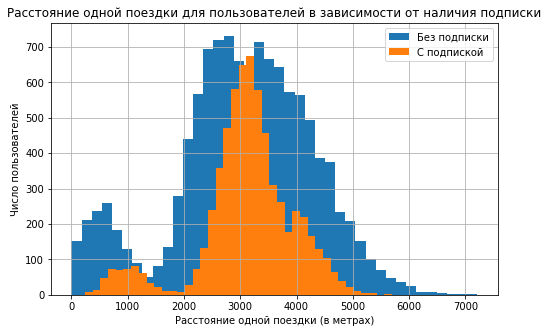

In [35]:
ax = df_all_free['distance'].plot(kind = 'hist', grid=True, figsize = (8,5), bins = 40, label='Без подписки')
ax = df_all_subs['distance'].plot(kind = 'hist', grid=True, figsize = (8,5), bins = 40, label='С подпиской')
plt.title('Расстояние одной поездки для пользователей в зависимости от наличия подписки')
plt.xlabel('Расстояние одной поездки (в метрах)')
plt.ylabel('Число пользователей')
plt.legend(loc='upper right')
plt.show()

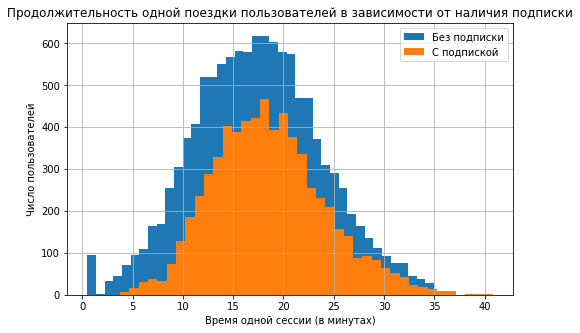

In [36]:
df_all_free['duration'].plot(kind = 'hist', grid=True, figsize = (8,5), bins = 40, label='Без подписки')
df_all_subs['duration'].plot(kind = 'hist', grid=True, figsize = (8,5), bins = 40, label='С подпиской')
plt.title('Продолжительность одной поездки пользователей в зависимости от наличия подписки')
plt.xlabel('Время одной сессии (в минутах)')
plt.ylabel('Число пользователей')
plt.legend(loc='upper right')
plt.show()

#### Промежуточный вывод шага 4
1. После выполнения данного шага был создан общий датафрейм со всей имеющейся информацией. На его основе были созданы 2 датафрейма с разделением в зависимости от наличия подписки
2. После визуализации этих 2 датафреймов можно сделать вывод о том, что наиболее выразительная разница наблюдается у пользователей доезжающих до 2000 метров, Так пользователи с подпиской проезжающие до 2000 в среднем проезжают 1000 метров, а без подписки только 500 метров. В то время как распределение длительности одной сессии практически не отличаются. Однако заметен выброс (100 пользователей) около 0 у пользователей без подписки

### Шаг 5. Подсчёт выручки

Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [37]:
# заранее для следующего шага подсчета выручки, округлим время поезки до следующего целого числа
df_all['duration'] = np.ceil(df_all['duration'])
df_all['duration'] = df_all['duration'].astype('int')

df_all_pt = df_all.pivot_table(index = ['user_id', 'month_of_date'], values = ['distance', 'duration'], aggfunc = ['count', 'sum'])
df_all_pt.columns = ['_'.join(col) for col in df_all_pt.columns.values]
df_all_pt = df_all_pt.drop(columns = 'count_duration').reset_index(drop = False)
df_all_pt

,user_id,month_of_date,count_distance,sum_distance,sum_duration
0,1,1,2,7027.511294,42
1,1,4,1,754.159807,7
2,1,8,2,6723.470560,46
3,1,10,2,5809.911100,32
4,1,11,3,7003.499363,56
...,...,...,...,...,...
11326,1534,6,2,3409.468534,26
11327,1534,8,2,7622.453034,48
11328,1534,9,1,4928.173852,23
11329,1534,11,4,13350.015305,78


Получился датафрейм, в котором в разрезе user_id и месяца поездки были посчитаны:
1. count_distance - число поездок
2. sum_distance - суммарное расстояние
3. sum_duration - суммарное время сессий

В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округлим до следующего целого числа

In [38]:
df_all_pt = df_all_pt.merge(df_user_go, how='left', on='user_id')
df_all_pt = df_all_pt.merge(df_sub_go, how = 'left', on = 'subscription_type')
df_all_pt

,user_id,month_of_date,count_distance,sum_distance,sum_duration,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,2,7027.511294,42,Кира,22,Тюмень,ultra,6,0,199
1,1,4,1,754.159807,7,Кира,22,Тюмень,ultra,6,0,199
2,1,8,2,6723.470560,46,Кира,22,Тюмень,ultra,6,0,199
3,1,10,2,5809.911100,32,Кира,22,Тюмень,ultra,6,0,199
4,1,11,3,7003.499363,56,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,2,3409.468534,26,Альберт,25,Краснодар,free,8,50,0
11327,1534,8,2,7622.453034,48,Альберт,25,Краснодар,free,8,50,0
11328,1534,9,1,4928.173852,23,Альберт,25,Краснодар,free,8,50,0
11329,1534,11,4,13350.015305,78,Альберт,25,Краснодар,free,8,50,0


In [39]:
df_all_pt['revenue'] = (df_all_pt['start_ride_price'] * df_all_pt['count_distance'] + df_all_pt['minute_price'] * df_all_pt['sum_duration'] + df_all_pt['subscription_fee'])
df_all_pt = df_all_pt.drop(columns = ['minute_price', 'start_ride_price', 'subscription_fee'])
df_all_pt

,user_id,month_of_date,count_distance,sum_distance,sum_duration,name,age,city,subscription_type,revenue
0,1,1,2,7027.511294,42,Кира,22,Тюмень,ultra,451
1,1,4,1,754.159807,7,Кира,22,Тюмень,ultra,241
2,1,8,2,6723.470560,46,Кира,22,Тюмень,ultra,475
3,1,10,2,5809.911100,32,Кира,22,Тюмень,ultra,391
4,1,11,3,7003.499363,56,Кира,22,Тюмень,ultra,535
...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,2,3409.468534,26,Альберт,25,Краснодар,free,308
11327,1534,8,2,7622.453034,48,Альберт,25,Краснодар,free,484
11328,1534,9,1,4928.173852,23,Альберт,25,Краснодар,free,234
11329,1534,11,4,13350.015305,78,Альберт,25,Краснодар,free,824


#### Промежуточный вывод шага 5
После выполнения данного шага удалось создать датафрейм, в котором вычислено помесячно для каждого пользователя выручка, суммарное расстояние, количество сессий и суммарную длительность сессий

### Шаг 6. Проверка гипотез

#### Шаг 6.1
Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Сравним 2 датафрейма df_all_free и df_all_sub и проверим гипотезы:
- Нулевая теория: среднее время поездок пользователей с подпиской и пользователей без подписки равны
- Альтернативная гипотеза: пользователи с подпиской тратят больше времени на поездки

In [40]:
alpha = 0.05 # уровень статистической значимости

# так как у нас левосторонняя альтернативная гипотеза используем параметр 'less'
results = st.ttest_ind(df_all_subs['duration'], df_all_free['duration'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Следовательно гипотеза верна: пользователи с подпиской тратят больше времени на поездки

Однако стоит перепроверить себя:

In [41]:
print('Среднее время поездки пользователей без подписки:', round(df_all_free['duration'].mean(),2))
print('Среднее время поездки пользователей c подпиской:', round(df_all_subs['duration'].mean(),2))

Среднее время поездки пользователей без подписки: 17.39
Среднее время поездки пользователей c подпиской: 18.54


#### Шаг 6.2
Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу и сделаем выводы.

У нас есть гипотезы:
- Нулевая гипотеза: среднее расстояние поездки пользователя с подпиской меньше, либо равна 3130 метрам
- Альтернативная гипотеза: среднее расстояние поездки пользователя с подпиской больше 3130 метров

In [42]:
interested_value = 3130

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(df_all_subs['distance'], interested_value, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


In [43]:
print('Среднее дистанция поездки пользователей c подпиской:', round(df_all_subs['distance'].mean(),0))

Среднее дистанция поездки пользователей c подпиской: 3115.0


Нулевая гипотеза подтверждена: среднее расстояние поездки пользователя с подпиской меньше, либо равна 3130 метрам

#### Шаг 6.3 
Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделаем вывод.

Имеется 2 гипотезы:
- Нулевая гипотеза: помесячная выручка от пользователей с подпиской и без равны
- Альтернативная гипотеза: помесячная выручка от пользователей с подпиской выше чем выручка от пользователей без подписки

In [44]:
# создадим два датафрейма с помесячной выручкой в зависимости от наличия подписки
df_all_pt_subs = df_all_pt[df_all_pt['subscription_type'] == 'ultra']
df_all_pt_free = df_all_pt[df_all_pt['subscription_type'] == 'free']

alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(df_all_pt_subs['revenue'], df_all_pt_free['revenue'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


p-value меньше заданного уровня значимости, поэтому отвергаем нулевую гипотезу. Следовательно можно сказать о том, что помесячная выручка от пользователей с подпиской выше чем выручка от пользователей без подписки

Это можно проверить:

In [45]:
print('Средняя помесячная выручка от пользователи без подписки:', round(df_all_pt_free['revenue'].mean(),2))
print('Средняя помесячная выручка от пользователи с подпиской:', round(df_all_pt_subs['revenue'].mean(),2))

Средняя помесячная выручка от пользователи без подписки: 328.64
Средняя помесячная выручка от пользователи с подпиской: 362.79


<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Здесь правильно</div>

#### Шаг 6.4
Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

##### Ответ:
Если имеются данные о количестве обращений в техподдержку для каждого пользователя до и после обновления серверов, и эти данные являются зависимыми (т.е., одно и то же лицо представлено как до, так и после обновления), то более подходящим тестом для проверки гипотезы будет парный t-тест для зависимых выборок. Для этого можно воспользоваться методом scipy.stats.ttest_rel(), передавая ему два набора данных: данные до обновления и после.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Верно </div>

#### Промежуточный вывод шага 6
В ходе выполнение данного шага удалось подтвердить гипотезы:
1. Пользователи с подпиской тратят больше времени на поездки
2. Среднее расстояние поездки пользователя с подпиской меньше 3130 метрам
3. Помесячная выручка от пользователей с подпиской выше чем выручка от пользователей без подписки

### Шаг 7. Распределения

#### Шаг 7.1
Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%. Подберем параметры распределения, описывающего эту ситуацию, построим график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Начнем с построения графика биномиального распределения.

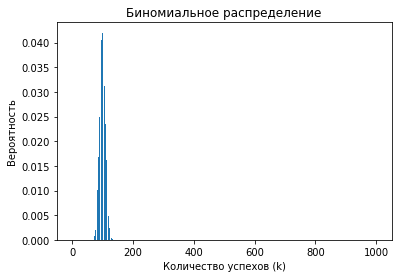

In [46]:
# определим примерный диапазон значений биномиального распределения графиком
n = 1000
p = 0.1
distr = []

for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p**k * (1 - p)**(n - k)
    distr.append(prob)

plt.bar(range(0, n + 1), distr);
plt.xlabel('Количество успехов (k)')
plt.ylabel('Вероятность')
plt.title('Биномиальное распределение')
plt.show()

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Не забывай подписывать заголовки для графиков и оси</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Надписи добавила
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

Определим минимальное количество промокодов в диапазоне (n-500, n+500), чтобы вероятность не выполнения плана была не более 5%.

In [47]:
for n in range (500,1500):
    if binom.cdf(99, n, p) < 0.05:
        print("Минимальное число промокодов:", n)
        break

Минимальное число промокодов: 1161


Для гарантированного получения не менее 100 продлений подписок при проведении акции раздачи промокодов с вероятностью невыполнения плана не более 5%, необходимо отправить менее 1161 промокода.

#### Шаг 7.2

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Воспользуемся аппроксимацией биномиального распределения нормальным распределением и произведем расчеты.

In [48]:
n = 1000000
p = 0.4

mu = n * p
sigma = sqrt(n * p * (1 - p))
distr = st.norm(mu, sigma)

x = 399500

# считаем вероятность получить значение, равное x или меньше
result = distr.cdf(x)

print('Вероятность что push-уведомления откроют не более 399,5 тыс. пользователей:',
      round(result, 2))

Вероятность что push-уведомления откроют не более 399,5 тыс. пользователей: 0.15


В условиях акции рассылки 1 миллиона push-уведомлений вероятность того, что их откроют не более, чем 399,5 тысяч пользователей, составляет 15%.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Дополнительные задачи решены правильно, молодец! </div>

#### Промежуточные выводы шага 7
Для отдела маркетинга были произведены расчеты и получены следующие результаты:
1. Для гарантированного получения не менее 100 продлений подписок при проведении акции раздачи промокодов с вероятностью невыполнения плана не более 5%, необходимо отправить менее 1161 промокода.
2. В условиях акции рассылки 1 миллиона push-уведомлений вероятность того, что их откроют не более, чем 399,5 тысяч пользователей, составляет 15%.

### Общие выводы
Предметом исследования является популярный сервис по аренде самокатов GoFast. Чтобы совершать поездки по городу, пользователи сервиса пользуются мобильным приложением. Для исследования были предоставлены данные о пользователях, поездках и подписках. Прежде чем приступать к анализу было произведено изучение данных на предмет пропусков, дубликатов (явных или неявных), а также на соответствие типам данных, чтобы дальнейшие выводы были более достоверны. После изучение данных были удалены явные дубликаты, а также произведено изменение типа столбца, чтобы он ему соответствовал. Неявные дубликаты и пропуски в данных выявлены не были
Далее был произведен исследовательский анализ данных и вот что удалось выявить:
1. Данные хранят информацию о пользователях и поездках из 8 городов
2. Большая доля пользователей приходится на Пятигорск, Екатеринбург, Ростов-на-Дону, что составляет 621 человек (40.5% от общего числа пользователей)
3. Меньше всего пользователей приходится на Москву - 168 человек (11% от общего числа пользователей)
4. Количество пользователей без подписки (free) превышает количество пользователей с платной подпиской ultra. Это может свидетельствовать о том, что большинство пользователей предпочитают пользоваться сервисом без регулярной платы за подписку (54.4% пользователей без подписки и 45.6% пользователей с подпиской).
5. Наибольшее количество пользователей в возрасте от 10 до 20 лет: Наибольшее количество пользователей сконцентрировано в возрастной группе от 10 до 20 лет, что может свидетельствовать о популярности приложения среди подростков и молодежи, которые активно используют самокаты в городской среде
6. Снижение числа пользователей с увеличением возраста: С увеличением возраста количество пользователей постепенно уменьшается, что вполне естественно, учитывая, что использование самоката может быть менее привлекательным для старших возрастных групп из-за физических ограничений или изменения интересов.
7. В большинстве случаев, среднее расстояние поездок составляет более 3 километров. Однако, есть небольшой пик около расстояния в 600 метров, что может указывать на то, что некоторые пользователи совершают короткие поездки, возможно, чтобы добраться до ближайших станций метро или других общественных транспортных средств.
8. Пользователи берут самокат в аренду в среднем на ~18 минут
После были произведены расчеты, выдвинуты и подтверждены следующие гипотезы:
1. Пользователи с подпиской тратят больше времени на поездки (Среднее время поездки пользователей без подписки - 17.39 минут и c подпиской - 18.54 минут)
2. Среднее расстояние поездки пользователя с подпиской меньше, либо равна 3130 метрам
3. Помесячная выручка от пользователей с подпиской выше чем выручка от пользователей без подписки (Средняя помесячная выручка от пользователи без подписки - 328.64 и с подпиской - 362.79)
Также для отдела маркетинга были произведены расчеты и получены следующие результаты:
1. Для гарантированного получения не менее 100 продлений подписок при проведении акции раздачи промокодов с вероятностью невыполнения плана не более 5%, необходимо отправить менее 1161 промокода.
2. В условиях акции рассылки 1 миллиона push-уведомлений вероятность того, что их откроют не более, чем 399,5 тысяч пользователей, составляет 15%.

Исходя из полученных результатов, можно дать следующие рекомендации:
1. Необходимо обратить внимание на области с высокой концентрацией пользователей и разработать меры по улучшению сервиса и инфраструктуры в этих регионах, чтобы удовлетворить спрос на аренду самокатов.
2. Разработать маркетинговые стратегии, направленные на увеличение числа подписчиков, предлагая им выгодные условия использования сервиса и акции.
3. Внимательно изучить поведение пользователей в разных возрастных группах и адаптировать сервис и маркетинговые стратегии под их потребности и предпочтения.
4. Создать акции и специальные предложения для пользователей, совершающих короткие поездки, чтобы стимулировать их чаще пользоваться сервисом.
5. Провести тестовые рассылки промокодов и push-уведомлений с целью увеличения числа активных пользователей и продлений подписок, учитывая вероятности, полученные в ходе анализа.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> 


Хороший итоговый вывод! Здорово, что сформулировала рекомендации!


    
**Хочу обратить твое внимание на то, что после исправления замечаний в некоторых пунктах исследования могут измениться результаты, поэтому нужно будет подкорректировать выводы.**
</div>